# Example: Analysis of Equally Weighted Portfolio Allocation
Fill me in

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions that we will use in the exercise, and custom types to model the components of our lab problem.
* For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl).

In [3]:
include("Include.jl");

## Prerequisites: Load and clean the testing dataset
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) from `01-03-2024` until last week `09-23-24` close, along with data for a few exchange-traded funds and volatility products during that time. We load the `prediction_dataset` by calling the `MyOutOfSampleMarketDataSet()` function:

In [5]:
out_of_sample_dataset = MyOutOfSampleMarketDataSet() |> x-> x["dataset"]

Dict{String, DataFrame} with 488 entries:
  "NI"   => 182×8 DataFrame…
  "EMR"  => 182×8 DataFrame…
  "CTAS" => 182×8 DataFrame…
  "HSIC" => 182×8 DataFrame…
  "KIM"  => 182×8 DataFrame…
  "PLD"  => 182×8 DataFrame…
  "IEX"  => 182×8 DataFrame…
  "BAC"  => 182×8 DataFrame…
  "CBOE" => 182×8 DataFrame…
  "EXR"  => 182×8 DataFrame…
  "NCLH" => 182×8 DataFrame…
  "CVS"  => 182×8 DataFrame…
  "DRI"  => 182×8 DataFrame…
  "DTE"  => 182×8 DataFrame…
  "ZION" => 182×8 DataFrame…
  "AVY"  => 182×8 DataFrame…
  "EW"   => 182×8 DataFrame…
  "EA"   => 182×8 DataFrame…
  "NWSA" => 182×8 DataFrame…
  "BBWI" => 182×8 DataFrame…
  "CAG"  => 182×8 DataFrame…
  "GPC"  => 182×8 DataFrame…
  "FCX"  => 182×8 DataFrame…
  "GILD" => 182×8 DataFrame…
  "UNP"  => 182×8 DataFrame…
  ⋮      => ⋮

Now, let's get the number of trading days of data that we have to experiment with. 

In [7]:
number_of_trading_days = out_of_sample_dataset["AAPL"] |> nrow

182

### Load single index models and compute the covariance
Previously, we estimated the parameters and residual distributions for each `ticker` and saved these to a [JLD2.jl file](https://github.com/JuliaIO/JLD2.jl). Load this file using the [load(...) function](https://juliaio.github.io/JLD2.jl/stable/#save-and-load-functions). 
* Store the model collection in the `sim_model_dictionary` variable, where the keys of the dictionary are the ticker symbols and the values are the parameterized [MySingleIndexModel instances](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/portfolio/#VLQuantitativeFinancePackage.MySingleIndexModel) estimated previously.

In [9]:
sim_model_dictionary = load(joinpath(_PATH_TO_DATA, "SIMs-SP500-01-03-18-to-12-29-23.jld2")) |> x->x["sim"]

Dict{String, MySingleIndexModel} with 460 entries:
  "NI"   => MySingleIndexModel(-0.0671224, 0.652999, 0.0389, Normal{Float64}(μ=…
  "EMR"  => MySingleIndexModel(-0.0549877, 1.23526, 0.0389, Normal{Float64}(μ=-…
  "CTAS" => MySingleIndexModel(0.119417, 1.17936, 0.0389, Normal{Float64}(μ=-6.…
  "HSIC" => MySingleIndexModel(-0.0811194, 0.913675, 0.0389, Normal{Float64}(μ=…
  "KIM"  => MySingleIndexModel(-0.0818621, 1.28859, 0.0389, Normal{Float64}(μ=-…
  "PLD"  => MySingleIndexModel(0.0273092, 1.02836, 0.0389, Normal{Float64}(μ=1.…
  "IEX"  => MySingleIndexModel(-0.00940007, 0.963259, 0.0389, Normal{Float64}(μ…
  "BAC"  => MySingleIndexModel(-0.0922207, 1.32778, 0.0389, Normal{Float64}(μ=-…
  "CBOE" => MySingleIndexModel(-0.00982405, 0.588498, 0.0389, Normal{Float64}(μ…
  "EXR"  => MySingleIndexModel(0.0252878, 0.725388, 0.0389, Normal{Float64}(μ=3…
  "NCLH" => MySingleIndexModel(-0.336719, 2.32891, 0.0389, Normal{Float64}(μ=1.…
  "CVS"  => MySingleIndexModel(-0.0703279, 0.78292, 0.0389

Next, let's build a sorted list of firms that we have in cleaned up `sim_model_dictionary::Dict{String, MySingleIndexModel}` and save it in the `list_of_all_tickers::Array{String,1}` array:

In [11]:
list_of_all_tickers = keys(sim_model_dictionary) |> collect |> sort;

Constants

In [13]:
σₘ = 0.1621; # implied volatility for SPY
μₘ = 0.10; # assumed expected return for SPY
risk_free_rate = 0.0389; # hypothetical continuous compounded risk-free rate (units: 1/year)
Δt = (1.0/252.0); # time step for 1-trading day (units: 1/year)
my_total_budget = 1000.0; # investment budget
δ = 1.01; # risk range -
startdate = Date(2024,01,03); # We will start our portfolio at the close of this day

Fill me in

In [15]:
(n_spy, S_spy) = let
    price_df = out_of_sample_dataset["SPY"];
    startprice = filter(:timestamp => x-> x >= startdate, price_df) |> x-> x[1,:close]
    nᵢ = (my_total_budget)/startprice;
    S = price_df[:,:close];
    nᵢ,S
end;

## Task 1: Equally Weighted Portfolio Allocation without Updates
Fill me in

In [17]:
my_list_of_tickers = ["AAPL", "MSFT", "MU", "AMD", "NVDA", "JNJ", "PG", "MRK", "PFE", "GS", "WFC", "JPM", "QQQ"]; # my list of assets
N = length(my_list_of_tickers); # number of assets in the portfolio 

### Get the initial share prices
Next, get the share price at the close of the market for each asset in the portfolio for the `startdate::Date.` We'll store these values in the `Sₒ::Array{Float64,1}` variable:

In [20]:
Sₒ = let
    Sₒ = Array{Float64,1}()
    for ticker ∈ my_list_of_tickers
        price_df = out_of_sample_dataset[ticker];
        startprice = filter(:timestamp => x-> x >= startdate, price_df) |> x-> x[1,:close]
        push!(Sₒ,startprice)
    end
    Sₒ;
end;

__Visualize__: Let's make a table to show the initial share price (close price):

In [22]:
let
    df = DataFrame()
    for ticker ∈ my_list_of_tickers
        price_df = out_of_sample_dataset[ticker];
        startprice = filter(:timestamp => x-> x >= startdate, price_df) |> x-> x[1,:close]
        row_df = (
            date = startdate,
            ticker = ticker,
            initial_share_price = startprice
        );
        push!(df, row_df);
    end
    pretty_table(df, tf=tf_simple)
end

============= ======== ======================
        date   ticker   initial_share_price 
        Date   String               Float64 
============= ======== ======================
  2024-01-03     AAPL                184.25
  2024-01-03     MSFT                 370.6
  2024-01-03       MU                 82.26
  2024-01-03      AMD                135.32
  2024-01-03     NVDA                47.569
  2024-01-03      JNJ                160.97
  2024-01-03       PG                147.84
  2024-01-03      MRK                114.77
  2024-01-03      PFE                 29.73
  2024-01-03       GS                381.79
  2024-01-03      WFC                 48.68
  2024-01-03      JPM                171.33
  2024-01-03      QQQ                398.33
============= ======== ======================


### Compute the initial number of shares
We compute the number of shares of each asset that corresponds to the optimal allocation (the point in the efficient frontier) and store these values in the `Nₒ::Array{Float64,1}` variable (in this case, we allow for fractional shares). The initial (optimal) number of shares is given by:
$$
n_{i} = \frac{\mathcal{B}\cdot\omega_{i}}{S_{\circ,i}}\quad\forall{i}\in\mathcal{P}
$$
where $\mathcal{B}$ denotes the investment inital budget, $S_{\circ,i}$ denotes the initial share price for asset $i$, and $\omega_{i}$ denotes the allocation fraction for asset $i$. In this case, we have an equal partition, so $\omega_{i} = 1/N$ where $N$ is the number of assets in the portfolio. We'll store the initial share count in the `Nₒ::Array{Float64,1}` variable.

In [24]:
Nₒ = let
    Nₒ = Array{Float64,1}()
    for i ∈ eachindex(my_list_of_tickers)
        
        wᵢ = 1/N; # equal weight allocation
        nᵢ = (wᵢ*my_total_budget)/Sₒ[i];
        push!(Nₒ,nᵢ)
    end
    Nₒ
end;

Make a table

In [26]:
let
    df = DataFrame();
    for i ∈ eachindex(my_list_of_tickers)
        ticker = my_list_of_tickers[i]; # get the ticker
        value = Nₒ[i]*Sₒ[i];

        row_df = (
            ticker = ticker,
            n = Nₒ[i],
            initial_share_price = Sₒ[i],
            value = value
        )
        push!(df, row_df);
    end

    footer = (
        ticker = "total",
        n = sum(Nₒ),
        initial_share_price = 0,
        value = sum(Nₒ.*Sₒ)
    )
    push!(df, footer)
    
    pretty_table(df, tf=tf_simple)   
end

========= ========== ===================== ==========
  ticker          n   initial_share_price     value 
  String    Float64               Float64   Float64 
========= ========== ===================== ==========
    AAPL   0.417493                184.25   76.9231
    MSFT   0.207564                 370.6   76.9231
      MU   0.935121                 82.26   76.9231
     AMD   0.568453                135.32   76.9231
    NVDA    1.61708                47.569   76.9231
     JNJ   0.477872                160.97   76.9231
      PG   0.520313                147.84   76.9231
     MRK   0.670237                114.77   76.9231
     PFE    2.58739                 29.73   76.9231
      GS    0.20148                381.79   76.9231
     WFC    1.58018                 48.68   76.9231
     JPM   0.448976                171.33   76.9231
     QQQ   0.193114                398.33   76.9231
   total    10.4253                   0.0    1000.0
========= ========== ===================== ==========


### What is the initial $\beta_{\mathcal{P}}$?
Fill me in

In [28]:
β = let

    β = 0.0; # initialize to zero
    wᵢ = 1/N; # equally weighted portfolio
    for ticker ∈ my_list_of_tickers
        βᵢ = sim_model_dictionary[ticker].β;
        β += wᵢ*βᵢ
    end
    β
end
println("The overall β for the portfolio: $(β)")

The overall β for the portfolio: 1.1035892934272276


### Simulation
Fill me in

In [30]:
(wealth_array, omega_array, beta_array) = let

    wealth_array = Array{Float64,2}(undef, number_of_trading_days, N+1); # last col is the total
    omega_array = Array{Float64,2}(undef, number_of_trading_days, N+1); 
    beta_array = Array{Float64,1}(undef, number_of_trading_days);
    for i = 1:number_of_trading_days

        # get the close price array -
        close_price_array = market(out_of_sample_dataset, my_list_of_tickers, i); # gets the close price for today
        
        # compute the wealth array -
        for j ∈ eachindex(my_list_of_tickers)
           wealth_array[i,j] = Nₒ[j]*close_price_array[j];
        end
        wealth_array[i,end] = sum(wealth_array[i,1:end-1]);

        # compute the omega array -
        for j ∈ eachindex(my_list_of_tickers)
            omega_array[i,j] = wealth_array[i,j]/(wealth_array[i,end])
        end
        omega_array[i,end] = sum(omega_array[i,1:end-1]);

        # compute beta -
        beta = 0.0
        for j ∈ eachindex(my_list_of_tickers)
            ticker = my_list_of_tickers[j];
            βᵢ = sim_model_dictionary[ticker].β;
            beta += omega_array[i,j]*βᵢ;
        end
        beta_array[i] = beta;
        
    end
    wealth_array,omega_array,beta_array
end;

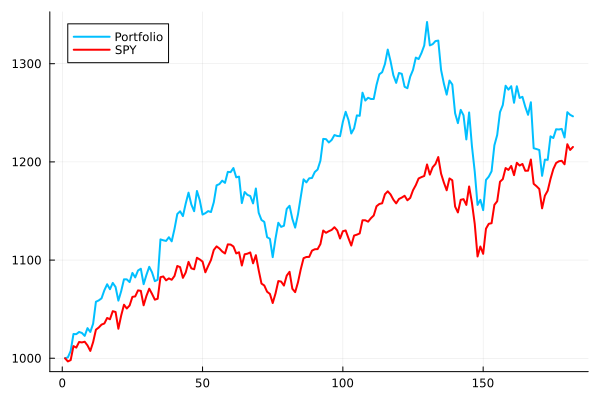

In [31]:
let
    plot(wealth_array[:,end], lw=2, c=:deepskyblue1, label="Portfolio")
    plot!(n_spy*S_spy, c=:red, lw=2, label="SPY")
end

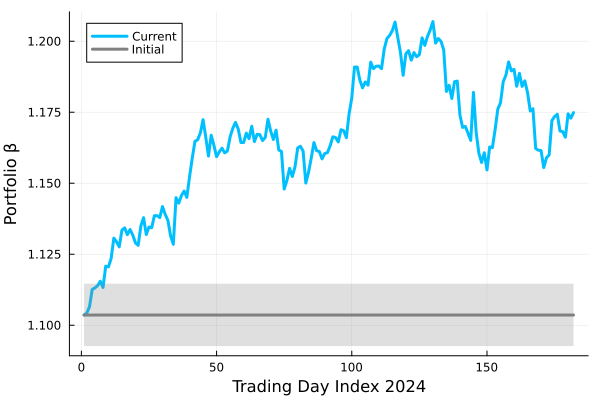

In [32]:
let
    LINE = β*ones(number_of_trading_days);
    U = δ*LINE;
    L = (1/δ)*LINE;
    
    plot(beta_array, c=:deepskyblue1, lw=3, label="Current")
    plot!(LINE, fillrange=U, c=:gray, fillalpha=0.25, label="")
    plot!(LINE, fillrange=L, c=:gray, fillalpha=0.25, label="")
    plot!(LINE, c=:gray, lw=3, label="Initial")
    xlabel!("Trading Day Index 2024", fontsize=18)
    ylabel!("Portfolio β", fontsize=18);
end

## Task 2: Equally Weighted Portfolio Allocation with Updates
Fill me in

In [34]:
(wealth_array_updates, omega_array_updates, beta_array_updates) = let

    # initialize storage 
    wealth_array = Array{Float64,2}(undef, number_of_trading_days, N+1); # last col is the total
    omega_array = Array{Float64,2}(undef, number_of_trading_days, N+1); 
    beta_array = Array{Float64,1}(undef, number_of_trading_days);

    Nᵢ = copy(Nₒ); 

    for i = 1:number_of_trading_days
    
        # --- SAME AS CONSTANT ALLOCATION ------------------------------------------------------------------------- #
        # get the close price array for day i
        close_price_array = market(out_of_sample_dataset, my_list_of_tickers, i); # gets the close price for today
        
        # compute the wealth array -
        for j ∈ eachindex(my_list_of_tickers)
           wealth_array[i,j] = Nᵢ[j]*close_price_array[j];
        end
        wealth_array[i,end] = sum(wealth_array[i,1:end-1]);

        # compute the omega array -
        for j ∈ eachindex(my_list_of_tickers)
            omega_array[i,j] = wealth_array[i,j]/(wealth_array[i,end])
        end
        omega_array[i,end] = sum(omega_array[i,1:end-1]);

        # compute beta -
        beta = 0.0
        for j ∈ eachindex(my_list_of_tickers)
            ticker = my_list_of_tickers[j];
            βᵢ = sim_model_dictionary[ticker].β;
            beta += omega_array[i,j]*βᵢ;
        end
        beta_array[i] = beta;
        # ------------------------------------------------------------------------------------------------------- #

        # - NEW ------------------------------------------------------------------------------------------------- #
        U = δ*β; # upper bound
        L = (1/δ)*β; # lower bound
        βᵢ = beta_array[i];
        if (βᵢ > U || βᵢ < L)

            # Ok: we are outside the risk range I'm comfortable with. Let's sell the portfolio at close and reallocate
            my_new_total_budget = wealth_array[i,end];
            next_price_array = market(out_of_sample_dataset, my_list_of_tickers, i); # gets the open price for today

            for j ∈ eachindex(my_list_of_tickers)
                wᵢ = 1/N; # equal weight allocation
                Nᵢ[j] = (wᵢ*my_new_total_budget)/next_price_array[j]; # reallocate
            end
        end
        # ------------------------------------------------------------------------------------------------------- #
    end

    wealth_array,omega_array,beta_array
end;

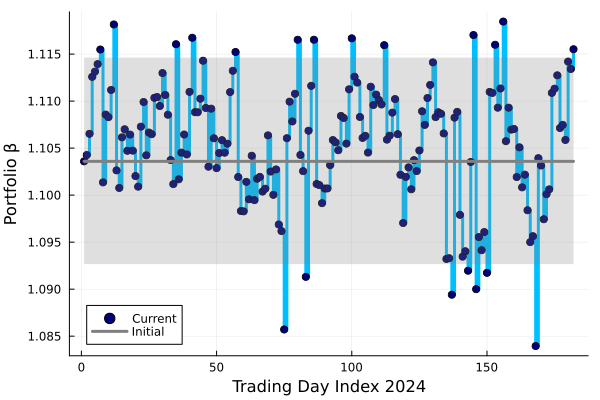

In [35]:
let
    LINE = β*ones(number_of_trading_days);
    U = δ*LINE;
    L = (1/δ)*LINE;
    
    plot(beta_array_updates, c=:deepskyblue1, lw=3, linetype=:steppost, label="")
    scatter!(beta_array_updates, c=:navy, label="Current")
    plot!(LINE, fillrange=U, c=:gray, fillalpha=0.25, label="")
    plot!(LINE, fillrange=L, c=:gray, fillalpha=0.25, label="")
    plot!(LINE, c=:gray, lw=3, label="Initial")
    xlabel!("Trading Day Index 2024", fontsize=18)
    ylabel!("Portfolio β", fontsize=18);
end

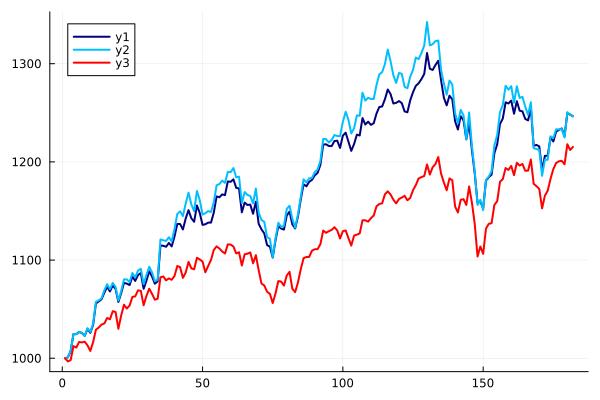

In [36]:
let
    plot(wealth_array_updates[:,end], lw=2, c=:navy)
    plot!(wealth_array[:,end], lw=2, c=:deepskyblue1)
    plot!(n_spy*S_spy, c=:red, lw=2)
end

## Task 3: Comparison of Fixed versus Reallocated Portfolios
Fill me in

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. You should decide solely based on your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.